In [4]:
### part 0
from tensorflow import keras
from tensorflow.keras import Input, layers, models
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.applications import InceptionResNetV2

import numpy as np

In [5]:
### part 1

input_tensor = Input(shape=(128, 128, 3), dtype='float32', name='input')

# pre_trained InceptionResNetV2
pre_trained_InceptionResNetV2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
pre_trained_InceptionResNetV2.trainable = False
pre_trained_InceptionResNetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 63, 63, 32)   96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 63, 63, 32)   0           batch_normalization_203[0][0]    
________________________________________________________________________________

In [6]:
# pre_trained 




model = models.Sequential()
model.add(pre_trained_InceptionResNetV2)
model.add(layers.Flatten())
model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

callbacks_list = [keras.callbacks.EarlyStopping(monitor = 'val_acc',
                                                patience = 5),
                 keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                    monitor = 'val_loss',
                                                    save_best_only = True)]

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 2, 2, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              25169920  
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

In [7]:
### part 2

X_train, X_test, y_train, y_test = np.load('2ndtrial.npy', allow_pickle=True)

print(X_train.shape)

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

history = model.fit(X_train, y_train, batch_size = 16, epochs = 50, callbacks=callbacks_list, validation_data = (X_test, y_test))

print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

40/40 [==============================] - 8s 199ms/step - loss: 2.6084 - acc: 0.9844 - val_loss: 2.5716 - val_acc: 0.9813
Epoch 30/50
40/40 [==============================] - 8s 199ms/step - loss: 2.5763 - acc: 0.9844 - val_loss: 2.5108 - val_acc: 1.0000
Epoch 31/50
40/40 [==============================] - 8s 199ms/step - loss: 2.5161 - acc: 0.9891 - val_loss: 2.4556 - val_acc: 1.0000
Epoch 32/50
40/40 [==============================] - 8s 199ms/step - loss: 2.4862 - acc: 0.9891 - val_loss: 2.4056 - val_acc: 1.0000
Epoch 33/50
40/40 [==============================] - 8s 198ms/step - loss: 2.4540 - acc: 0.9875 - val_loss: 2.4213 - val_acc: 1.0000
Epoch 34/50
40/40 [==============================] - 8s 198ms/step - loss: 2.4401 - acc: 0.9875 - val_loss: 2.3606 - val_acc: 0.9953
Epoch 35/50
40/40 [==============================] - 8s 198ms/step - loss: 2.3995 - acc: 0.9922 - val_loss: 2.3267 - val_acc: 1.0000
Epoch 36/50
40/40 [==============================] - 8s 198ms/step - loss: 2.3683

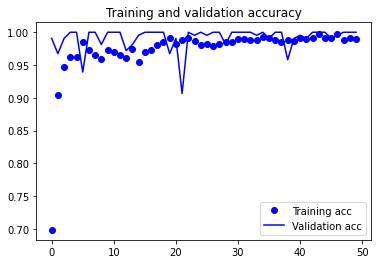

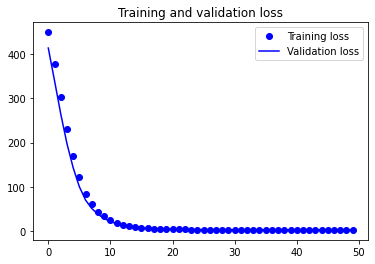

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
### part 3

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('frame116.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.96848965, 0.01491515, 0.0056516 , 0.01094364]], dtype=float32)

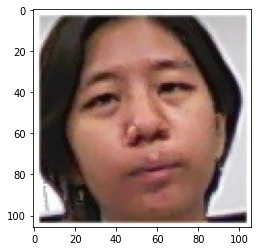

In [10]:
import cv2



test1 = cv2.imread("frame116.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [11]:
img = image.load_img('frame17.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.00902416, 0.97551936, 0.01390771, 0.00154878]], dtype=float32)

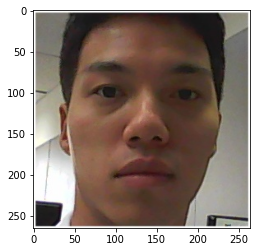

In [12]:
test1 = cv2.imread("frame17.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [13]:
img = image.load_img('frame7.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[0.02671395, 0.06725989, 0.8665249 , 0.03950125]], dtype=float32)

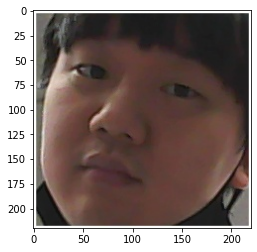

In [14]:
test1 = cv2.imread("frame7.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [15]:
img = image.load_img('frame29.jpg', target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype(float) / 255
model.predict(img)

array([[4.1729435e-03, 3.8630000e-04, 2.5593208e-03, 9.9288142e-01]],
      dtype=float32)

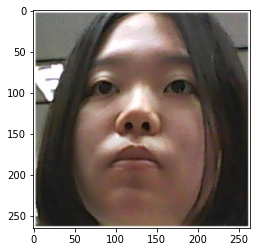

In [16]:
test1 = cv2.imread("frame29.jpg")
test1.shape

#cv2 bgr -> rgb로 조정
b, g, r = cv2.split(test1)    
test1 = cv2.merge([r,g,b])  

# 시각화
plt.figure()
plt.imshow(test1)
plt.show()

In [17]:
model.save("model.h5")